In [1]:
!git clone https://github.com/hehehe23/data.git

Cloning into 'data'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
Checking out files: 100% (18/18), done.


In [2]:
!unzip data/\*.zip

Streaming output truncated to the last 5000 lines.
  inflating: 60/IW3STK17.jpg         
  inflating: 60/O0J83F10.jpg         
  inflating: 60/3ZG8M57.jpg          
  inflating: 60/UXC8C14.jpg          
  inflating: 60/IVAY3Z4.jpg          
  inflating: 60/GBZ58016.jpg         
  inflating: 60/IVAY3Z2.jpg          
  inflating: 60/YRLV6J9.jpg          
  inflating: 60/NTG62K10.jpg         
  inflating: 60/UU0LY017.jpg         
  inflating: 60/Q9HMHT16.jpg         
  inflating: 60/CU2URV4.jpg          
  inflating: 60/HKJSOR4.jpg          
  inflating: 60/8QX7BY15.jpg         
  inflating: 60/A813UM13.jpg         
  inflating: 60/YRLV6J3.jpg          
  inflating: 60/YRLV6J7.jpg          
  inflating: 60/d5.jpg               
  inflating: 60/SKEG231.jpg          
  inflating: 60/Q80NB912.jpg         
  inflating: 60/VHAMV93.jpg          
  inflating: 60/NTG62K2.jpg          
  inflating: 60/LCQEVJ16.jpg         
  inflating: 60/Q9HMHT14.jpg         
  inflating: 60/K6EL8B15.jpg         

In [3]:
!mkdir train

In [4]:
!mv 1* 2* 3* 4* 6* 8* train/
!rm -rf data/

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [3]:
data_path = '/content/train'

batch_size = 64
size = 80

In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split = 0.2,
  subset = "training",
  seed = 666,
  image_size = (size, size),
  batch_size = batch_size)

val = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split = 0.2,
  subset = "validation",
  seed = 666,
  image_size = (size, size),
  batch_size = batch_size)

class_names = train.class_names
print(class_names)


Found 34180 files belonging to 18 classes.
Using 27344 files for training.
Found 34180 files belonging to 18 classes.
Using 6836 files for validation.
['100', '120', '140', '160', '180', '20', '200', '220', '240', '260', '280', '300', '320', '340', '360', '40', '60', '80']


(64, 80, 80, 3)
(64,)


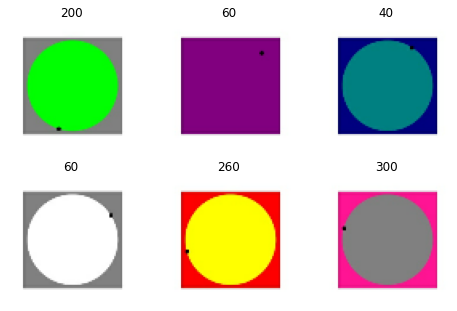

In [5]:
plt.figure(figsize = (8, 8))
for images, labels in train.take(1):
  for x in range(6):
    ax = plt.subplot(3, 3, x + 1)
    plt.imshow(images[x].numpy().astype("uint8"))
    plt.title(class_names[labels[x]])
    plt.axis("off")

for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val = val.cache().prefetch(buffer_size = AUTOTUNE)


In [7]:
model = tf.keras.models.Sequential()

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(size, size, 3)),
  layers.Conv2D(16, 3, padding='same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dropout(0.5),
  layers.Dense(len(class_names), activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)       

In [8]:
model.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                                                                metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.25,
                              patience = 5, min_lr = 0.001)

In [ ]:
epochs = 20

hist = model.fit(
  train,
  validation_data = val,
  epochs = epochs,
  callbacks=[reduce_lr])


Epoch 1/20
428/428 [==============================] - 7s 15ms/step - loss: 2.8905 - accuracy: 0.0554 - val_loss: 2.8905 - val_accuracy: 0.0505
Epoch 2/20
428/428 [==============================] - 3s 7ms/step - loss: 2.2800 - accuracy: 0.7007 - val_loss: 1.9969 - val_accuracy: 0.9845
Epoch 3/20
428/428 [==============================] - 3s 7ms/step - loss: 1.9908 - accuracy: 0.9915 - val_loss: 1.9847 - val_accuracy: 0.9971
Epoch 4/20
428/428 [==============================] - 3s 7ms/step - loss: 1.9851 - accuracy: 0.9970 - val_loss: 1.9818 - val_accuracy: 0.9999
Epoch 5/20
428/428 [==============================] - 3s 7ms/step - loss: 1.9833 - accuracy: 0.9986 - val_loss: 1.9820 - val_accuracy: 0.9997
Epoch 6/20
428/428 [==============================] - 3s 7ms/step - loss: 1.9833 - accuracy: 0.9986 - val_loss: 1.9827 - val_accuracy: 0.9990
Epoch 7/20
428/428 [==============================] - 3s 7ms/step - loss: 1.9830 - accuracy: 0.9989 - val_loss: 1.9817 - val_accuracy: 0.9999
Epoch

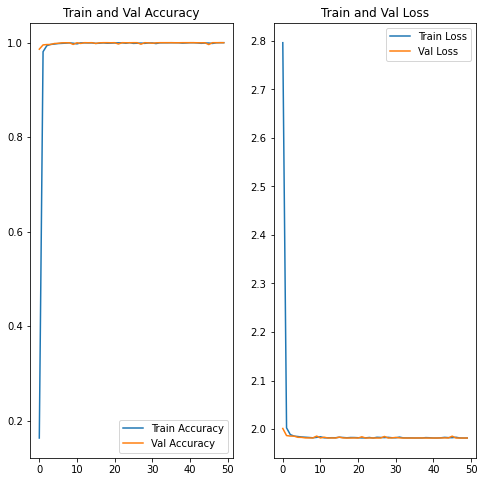

In [10]:
def plot():
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize = (8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label = 'Train Accuracy')
  plt.plot(epochs_range, val_acc, label = 'Val Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Train and Val Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label = 'Train Loss')
  plt.plot(epochs_range, val_loss, label = 'Val Loss')
  plt.legend(loc = 'upper right')
  plt.title('Train and Val Loss')
  plt.show()
  return

plot()

In [12]:
model.save('/content/model.h5')